# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [4]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
soup = soup(html, 'html.parser')

In [34]:
# Extract all rows of data
rows = soup.find_all('tr', class_='data-row')
rows


[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [35]:
#create an empty list to store the dictionaries
mars_facts = []
# Loop through the rows
for row in rows:
    data = row.find_all('td')
    id = data[0].text
    terrestrial_date = data[1].text
    sol = data[2].text
    ls = data[3].text
    month = data[4].text
    min_temp = data[5].text
    pressure = data[6].text
        
    mars_dict = {'id': id, 
                     'terrestrial_date': terrestrial_date, 
                     'sol': sol, 
                     'ls': ls, 
                     'month': month, 
                     'min_temp': min_temp, 
                     'pressure': pressure}
    mars_facts.append(mars_dict)
    


In [42]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_facts)

In [55]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [44]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [47]:
# Change data types for data analysis
#change 'id' to integer
df['id'] = df['id'].astype(int)
# Convert the 'terrestrial_date' column to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
#convert 'sol','ls', and 'month' to integer
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
#convert 'min_temp' and 'pressure' to float
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)


In [48]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [50]:
# 1. How many months are there on Mars?
df['month'].nunique()

12

In [51]:
# 2. How many Martian days' worth of data are there?
df['sol'].nunique()

1867

<AxesSubplot: xlabel='month'>

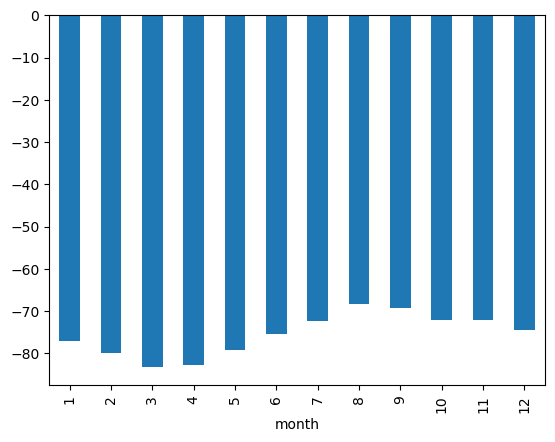

In [66]:
# 3. What is the average low temperature by month?
# Group the data by month and calculate the average minimum daily temperature for each month
monthly_temp = df.groupby(df['month'])['min_temp'].mean()
# Plot the results as a bar chart
monthly_temp.plot(kind='bar')


<AxesSubplot: xlabel='month'>

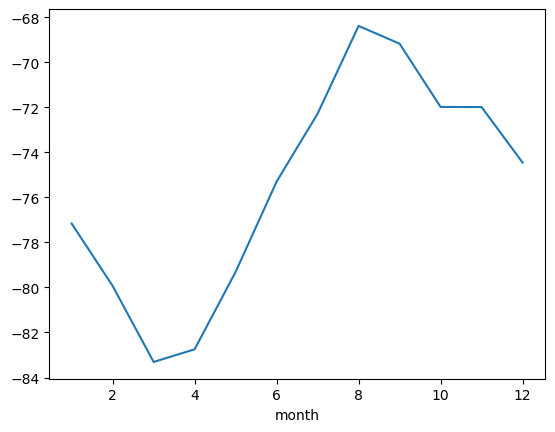

In [67]:
# Plot the average temperature by month line chart shows the change much better than bar
monthly_temp.plot(kind = 'line')

In [90]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = df[df['min_temp'] == -90.0]
warmest_month = df[df['min_temp'] == -62.0]
print(f'Minimum temp: Month #3 {minimum},  Maximum temp: Month #1 {maximum}')
print()
print(f'Using the charts above, on average the coldest month is the 3rd month, and the warmest month is the 8th... However when searching the dataframe for the warmest month on record. The first month was found ')
print()
print('Using the average will return different results than what I have shown here')

Minimum temp: Month #3 -90.0,  Maximum temp: Month #1 -62.0

Using the charts above, on average the coldest month is the 3rd month, and the warmest month is the 8th... However when searching the dataframe for the warmest month on record. The first month was found 

Using the average will return different results than what I have shown here


In [81]:
# 4. Average pressure by Martian month
# Group the data by month and calculate the average daily atmospheric pressure for each month
monthly_pressure = df.groupby(df['month'])['pressure'].mean()

<AxesSubplot: xlabel='terrestrial_date'>

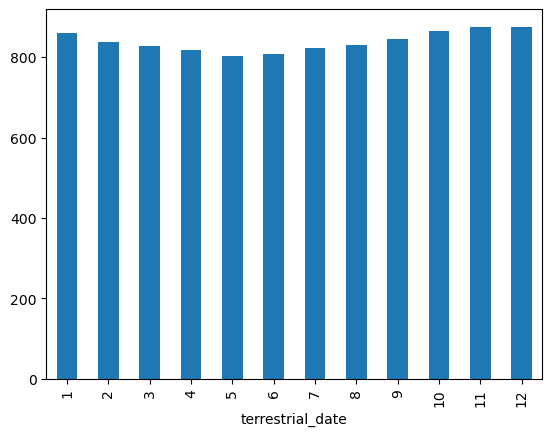

In [82]:
# Plot the average pressure by month
# Group the data by month and calculate the average daily atmospheric pressure for each month
monthly_pressure = df.groupby(df['terrestrial_date'].dt.month)['pressure'].mean()
# Plot the results as a bar chart
monthly_pressure.plot(kind='bar')



Using the chart above and below, the lowest atmospheric pressure can be found in the 5th month and the highest in the 11th
The chart in the cell above does not do a very good job of showing the differences and I therefore converted it into a line chart


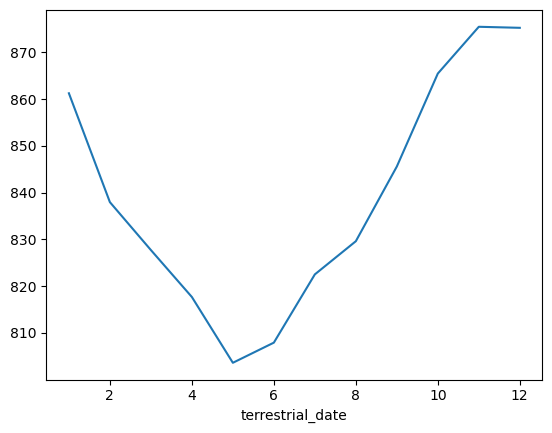

In [97]:
#line chart shows this much better (monthly pressure)

monthly_pressure.plot(kind='line')

print('Using the chart above and below, the lowest atmospheric pressure can be found in the 5th month and the highest in the 11th')
print('The chart in the cell above does not do a very good job of showing the differences and I therefore converted it into a line chart')

Using this chart, it looks as though from peak to peak or trough to trough takes about 2 years.. just a little less
Using one year in earths time looks to be equivalent to half of a martian year


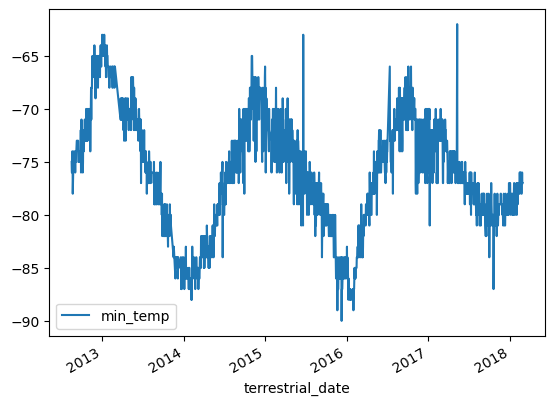

In [94]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# plot the daily minimum temperature over time
df.plot(x='terrestrial_date', y='min_temp')
print('Using this chart, it looks as though from peak to peak or trough to trough takes about 2 years.. just a little less')
print('Using one year in earths time looks to be equivalent to half of a martian year')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [91]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)


In [ ]:
browser.quit()